In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set up Matplotlib for inline plots
%matplotlib inline

from google.colab import files
uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')


Saving EV_DS.xlsx to EV_DS.xlsx
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Assuming the uploaded file is named 'dataset.csv'
df = pd.read_csv('EV_DS.csv')

# Display the first few rows of the DataFrame to confirm
df.head()


,_id,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,Site,Model
0,1,51516,2,2019-08-31T00:00:00,23:26,2019-08-31T00:00:00,23:54,12.780,"Kinross Park and Ride, Kinross",APT Triple Rapid Charger
1,2,51249,1,2019-08-31T00:00:00,21:12,2019-08-31T00:00:00,21:32,5.700,"Atholl Street Car Park, Dunkeld",Siemens Triple Rapid Charger
2,3,50995,2,2019-08-31T00:00:00,20:26,2019-08-31T00:00:00,21:20,27.680,"Moness Terrace Car Park, Aberfeldy",APT Triple Rapid Charger
3,4,50839,1,2019-08-31T00:00:00,20:06,2019-08-31T00:00:00,23:03,17.526,"Mill Street, Perth",APT 22kW Raption
4,5,50745,2,2019-08-31T00:00:00,19:43,2019-08-31T00:00:00,20:23,12.930,"Kinross Park and Ride, Kinross",APT Triple Rapid Charger


In [ ]:
# Get the shape of the dataset (rows, columns)
df.shape


(32711, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32711 entries, 0 to 32710
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _id         32711 non-null  int64  
 1   CP ID       32711 non-null  int64  
 2   Connector   32711 non-null  int64  
 3   Start Date  32711 non-null  object 
 4   Start Time  32711 non-null  object 
 5   End Date    32606 non-null  object 
 6   End Time    32606 non-null  object 
 7   Total kWh   32606 non-null  float64
 8   Site        32711 non-null  object 
 9   Model       32711 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,_id,CP ID,Connector,Total kWh
count,32711.000000,32711.000000,32711.000000,32606.000000
mean,16356.000000,50885.607196,1.754395,10.865159
std,9442.996664,462.711556,0.578024,9.021710
min,1.000000,50245.000000,1.000000,-0.001000
25%,8178.500000,50297.000000,1.000000,4.950000
50%,16356.000000,50839.000000,2.000000,8.580000
75%,24533.500000,51250.000000,2.000000,14.939750
max,32711.000000,51519.000000,3.000000,287.710000


In [ ]:
# Check for missing values in each column
df.isnull().sum()


,0
_id,0
CP ID,0
Connector,0
Start Date,0
Start Time,0
End Date,105
End Time,105
Total kWh,105
Site,0
Model,0


In [ ]:
# prompt: df['End Date'] = df['End Date'].fillna(method='ffill')
#     df['End Time'] = df['End Time'].fillna(method='ffill')

df['End Date'] = df['End Date'].fillna(method='ffill')
df['End Time'] = df['End Time'].fillna(method='ffill')

<ipython-input-7-3d67719c3767>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['End Date'] = df['End Date'].fillna(method='ffill')
<ipython-input-7-3d67719c3767>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['End Time'] = df['End Time'].fillna(method='ffill')


In [ ]:
 df['Total kWh'] = df['Total kWh'].interpolate(method='linear')


In [ ]:
df.isnull().sum()

,0
_id,0
CP ID,0
Connector,0
Start Date,0
Start Time,0
End Date,0
End Time,0
Total kWh,0
Site,0
Model,0


In [ ]:
# Combine 'Start Date' and 'Start Time' correctly by converting 'Start Time' to string
df ['Start DateTime'] = pd.to_datetime (df['Start Date'])
df['End DateTime'] = pd.to_datetime(df['End Date'])
# 1. Session Duration (in minutes)
df['Session Duration (minutes)'] = (df['End DateTime'] - df['Start DateTime']).dt.total_seconds() / 60

# 2. Energy Efficiency (kWh per minute)
df['Energy Efficiency (kWh/min)'] = df['Total kWh'] / df['Session Duration (minutes)']

# 3. Day of Week
df['Day of Week'] = df['Start DateTime'].dt.day_name()

# Display the updated dataset with new features
df.head()


,_id,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,Site,Model,Start DateTime,End DateTime,Session Duration (minutes),Energy Efficiency (kWh/min),Day of Week
0,1,51516,2,2019-08-31T00:00:00,23:26,2019-08-31T00:00:00,23:54,12.780,"Kinross Park and Ride, Kinross",APT Triple Rapid Charger,2019-08-31,2019-08-31,0.0,inf,Saturday
1,2,51249,1,2019-08-31T00:00:00,21:12,2019-08-31T00:00:00,21:32,5.700,"Atholl Street Car Park, Dunkeld",Siemens Triple Rapid Charger,2019-08-31,2019-08-31,0.0,inf,Saturday
2,3,50995,2,2019-08-31T00:00:00,20:26,2019-08-31T00:00:00,21:20,27.680,"Moness Terrace Car Park, Aberfeldy",APT Triple Rapid Charger,2019-08-31,2019-08-31,0.0,inf,Saturday
3,4,50839,1,2019-08-31T00:00:00,20:06,2019-08-31T00:00:00,23:03,17.526,"Mill Street, Perth",APT 22kW Raption,2019-08-31,2019-08-31,0.0,inf,Saturday
4,5,50745,2,2019-08-31T00:00:00,19:43,2019-08-31T00:00:00,20:23,12.930,"Kinross Park and Ride, Kinross",APT Triple Rapid Charger,2019-08-31,2019-08-31,0.0,inf,Saturday


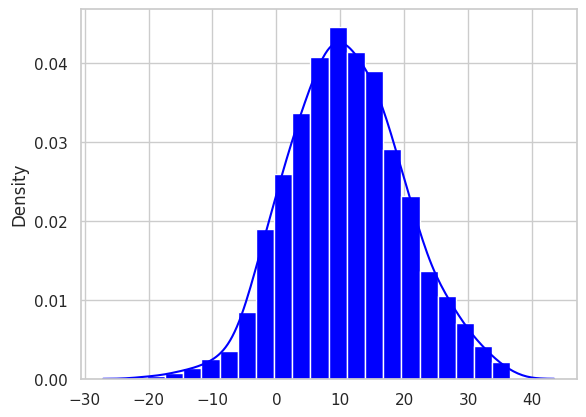

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# 1. Plot the distribution of one numeric column using a histogram
# Generate random data points based on the mean and standard deviation of 'Total kWh'
x = np.random.normal(loc=df['Total kWh'].mean(), scale=df['Total kWh'].std(), size=1000)

# Plot the histogram with specified bins and color
plt.hist(x, bins=20, color='blue', density=True)  # density=True for normalized histogram

# Add a kernel density estimate (kde)
sns.kdeplot(x, color='blue')

plt.show()

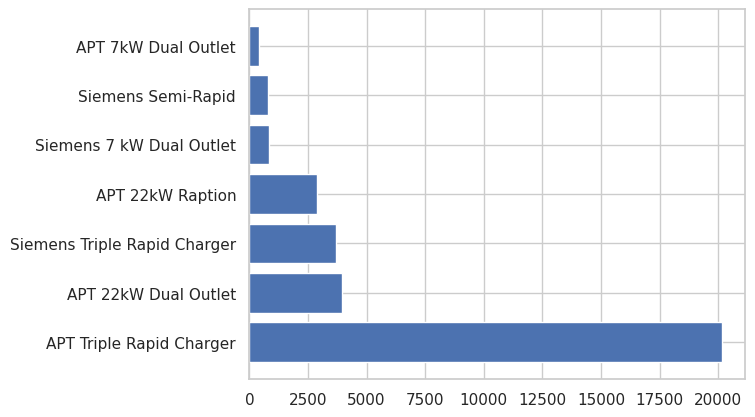

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the value counts for the 'Model' column
model_counts = df['Model'].value_counts()

# Create a bar plot
plt.barh(model_counts.index, model_counts.values)

plt.show()

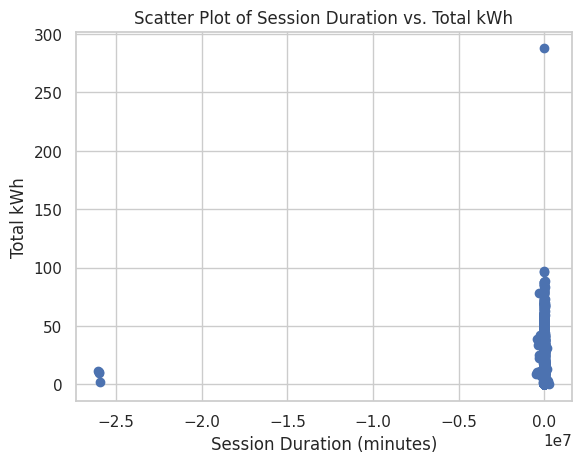

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Correctly access data from the DataFrame columns
x = df['Session Duration (minutes)']
y = df['Total kWh']

# Create the scatter plot
plt.scatter(x, y)

plt.xlabel('Session Duration (minutes)')  # Add label for x-axis
plt.ylabel('Total kWh')  # Add label for y-axis
plt.title('Scatter Plot of Session Duration vs. Total kWh')  # Add title

plt.show()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                                  _id     CP ID  Connector  Total kWh  \
_id                          1.000000 -0.008389   0.006515   0.017316   
CP ID                       -0.008389  1.000000  -0.005435  -0.023364   
Connector                    0.006515 -0.005435   1.000000   0.018937   
Total kWh                    0.017316 -0.023364   0.018937   1.000000   
Session Duration (minutes)   0.002262  0.014276  -0.004936   0.002915   
Energy Efficiency (kWh/min)  0.023502  0.197636  -0.054841   0.571152   

                             Session Duration (minutes)  \
_id                                            0.002262   
CP ID                                          0.014276   
Connector                                     -0.004936   
Total kWh                                      0.002915   
Session Duration (minutes)                     1.000000   
Energy Efficiency (kWh/min)                    0.087870   

                             Energy Efficiency (kWh/min)  
_id            

**Data Loading And Basic Exploration**

---



Loading The Dataset

In [ ]:
Data_load= np.genfromtxt("EV_DS.csv", delimiter=",", dtype=float,usecols=[0,1,2,7], skip_header=1)

Basic Summary

In [ ]:
print(Data_load[:5])

[[1.0000e+00 5.1516e+04 2.0000e+00 1.2780e+01]
 [2.0000e+00 5.1249e+04 1.0000e+00 5.7000e+00]
 [3.0000e+00 5.0995e+04 2.0000e+00 2.7680e+01]
 [4.0000e+00 5.0839e+04 1.0000e+00 1.7526e+01]
 [5.0000e+00 5.0745e+04 2.0000e+00 1.2930e+01]]


Data Type

In [ ]:
print(Data_load.dtype)

float64


**Data Cleaning And Prepration**

---



Finding Missing Values

In [ ]:
missing_values = np.isnan(Data_load)

In [ ]:
print(missing_values)

[[False False False False]
 [False False False False]
 [False False False False]
 ...
 [False False False False]
 [False False False False]
 [False False False False]]


Replacing Missing Values With Mean

In [ ]:
column0mean = np.nanmean(Data_load, axis=0)

In [ ]:
print(column0mean)

[1.63560000e+04 5.08856072e+04 1.75439455e+00 1.08651588e+01]


Removing Duplicates

In [ ]:
unique_data = np.unique(Data_load, axis=0)

In [ ]:
print(unique_data)

[[1.0000e+00 5.1516e+04 2.0000e+00 1.2780e+01]
 [2.0000e+00 5.1249e+04 1.0000e+00 5.7000e+00]
 [3.0000e+00 5.0995e+04 2.0000e+00 2.7680e+01]
 ...
 [3.2709e+04 5.0994e+04 2.0000e+00 1.0840e+01]
 [3.2710e+04 5.0286e+04 2.0000e+00 8.7800e+00]
 [3.2711e+04 5.0286e+04 2.0000e+00 1.6430e+01]]


Normalizing Data

In [ ]:
normalized_data = (Data_load - np.mean(Data_load, axis=0)) / np.std(Data_load, axis=0)

In [ ]:
print(normalized_data)

[[-1.73199786  1.36240911  0.42491158         nan]
 [-1.73189196  0.78536694 -1.305146           nan]
 [-1.73178606  0.23642045  0.42491158         nan]
 ...
 [ 1.73178606  0.23425925  0.42491158         nan]
 [ 1.73189196 -1.29587505  0.42491158         nan]
 [ 1.73199786 -1.29587505  0.42491158         nan]]


**Statistical Analysis**

---



Calculating Mean

In [ ]:
print('Mean of each column:', np.mean(Data_load, axis=0))

Mean of each column: [1.63560000e+04 5.08856072e+04 1.75439455e+00            nan]


In [ ]:
print('Mean of each column:', np.mean(normalized_data, axis=0))

Mean of each column: [-8.20677837e-18 -1.78770649e-16 -8.16934216e-16             nan]


Calculating Median

In [ ]:
print('Median of each column:', np.median(Data_load, axis=0))

Median of each column: [1.6356e+04 5.0839e+04 2.0000e+00        nan]


In [ ]:
print('Medin of each column:', np.median(normalized_data, axis=0))

Medin of each column: [ 0.         -0.10072778  0.42491158         nan]


Calculating Standard Deviation  

In [ ]:
print('Standard Deviation of each column:', np.std(Data_load, axis=0))

Standard Deviation of each column: [9.44285232e+03 4.62704484e+02 5.78015445e-01            nan]


In [ ]:
print('Standard Deviation of each column:', np.std(normalized_data, axis=0))

Standard Deviation of each column: [ 1.  1.  1. nan]


**Distribution Analysis**

---



Plotting Histogram

In [ ]:
chosen_column = Data_load[:,[0,1,2] ]
histo_gram= np.histogram(chosen_column, bins=10)

In [ ]:
print(histo_gram)

(array([37863,  5152,  5152,  5152,  5151,  5152,  1800,     0,     0,
       32711]), array([1.00000e+00, 5.15280e+03, 1.03046e+04, 1.54564e+04, 2.06082e+04,
       2.57600e+04, 3.09118e+04, 3.60636e+04, 4.12154e+04, 4.63672e+04,
       5.15190e+04]))


In [ ]:
chosen_column = normalized_data[:,[0,1,2] ]
histo_gram= np.histogram(chosen_column, bins=10)

In [ ]:
print(histo_gram)

(array([ 4836, 22067,  5091,  6536,  7353, 27562,  8292, 10615,  3347,
        2434]), array([-1.73199786, -1.34330116, -0.95460446, -0.56590776, -0.17721105,
        0.21148565,  0.60018235,  0.98887905,  1.37757575,  1.76627245,
        2.15496915]))


Correlation

In [ ]:
correlation= np.corrcoef(Data_load, rowvar=False)

In [ ]:
print(correlation)

[[ 1.         -0.00838892  0.00651476         nan]
 [-0.00838892  1.         -0.00543526         nan]
 [ 0.00651476 -0.00543526  1.                 nan]
 [        nan         nan         nan         nan]]


**Data Transformation**

---



Adding New Features

Connector Efficiency

In [ ]:
total_kwh = Data_load[:, 3]
connector = Data_load[:, 2]

In [ ]:
connector_efficiency = total_kwh / connector

In [ ]:
new_feature = np.insert(Data_load, 4, connector_efficiency, axis=1)

In [ ]:
print(new_feature)

[[1.0000e+00 5.1516e+04 2.0000e+00 1.2780e+01 6.3900e+00]
 [2.0000e+00 5.1249e+04 1.0000e+00 5.7000e+00 5.7000e+00]
 [3.0000e+00 5.0995e+04 2.0000e+00 2.7680e+01 1.3840e+01]
 ...
 [3.2709e+04 5.0994e+04 2.0000e+00 1.0840e+01 5.4200e+00]
 [3.2710e+04 5.0286e+04 2.0000e+00 8.7800e+00 4.3900e+00]
 [3.2711e+04 5.0286e+04 2.0000e+00 1.6430e+01 8.2150e+00]]


Array Reshaping

In [ ]:
new_data = np.reshape(new_feature, (32711,5))

In [ ]:
print(new_data)

[[1.0000e+00 5.1516e+04 2.0000e+00 1.2780e+01 6.3900e+00]
 [2.0000e+00 5.1249e+04 1.0000e+00 5.7000e+00 5.7000e+00]
 [3.0000e+00 5.0995e+04 2.0000e+00 2.7680e+01 1.3840e+01]
 ...
 [3.2709e+04 5.0994e+04 2.0000e+00 1.0840e+01 5.4200e+00]
 [3.2710e+04 5.0286e+04 2.0000e+00 8.7800e+00 4.3900e+00]
 [3.2711e+04 5.0286e+04 2.0000e+00 1.6430e+01 8.2150e+00]]


Filtering

In [ ]:
filter_data = np.where(Data_load[:,3] )

In [ ]:
print(filter_data)

(array([    0,     1,     2, ..., 32708, 32709, 32710]),)
